## Лабораторная работа №3. Многомерный фильтр Калмана
**Цель работы** - спроектировать динамическую модель процесса по варианту и применить многомерный фильтр Калмана для нахождения оценок вектора состояния, а также различные метрики точности при использовании различных настроек ФК


## Теоретические сведения
Обощенная блок-схема работы многомерного фильтра Калмана для линейной динамической системы представлена на рисунке ниже

![](https://drive.google.com/uc?export=view&id=1DtxEWzOYSNlKWg2A2hJDQv-ujkfv4uIm)

## Задание лабораторной работы
1.   Написать функцию по генерации истинных значений процесса и  измерений по заданию из варианта. Сохранить истинные значения и измерения в отдельных файлах.
2.   Реализовать функцию работы многомерного Фильтра Калмана, куда можно передавать файл с истинными значениями, файл с измерениями, начальные значения вектора оценки и ковариационной матрицы, а также векторы дисперсий матриц ошибки процесса и погрешности измерений $R, Q$. Пусть погрешности элементов вектора состояния и измерения не коррелированы. Функция должна сохранять результат работы ФК в файл (вектор состояния на каждом шаге, основную диагональ матрицы ковариации, норма вектора инновации).
3.   Написать функцию, (1) реализующую последовательный запуск ФК с различными начальными параметрами. (2) Функция должна высчитывать такие метрики точности как максимальная погрешность, средняя погрешность, RMSE, а также строить график истинного значения, измерений и оценки параметра ФК с 95% доверительной границей. (3) Должен строиться график инновации.(4) Функция должна делать косвенный вывод о схождении работы ФК и времени схождения, для чего необходимо самостоятельно выбрать метрику схождения.
4.   Осуществить запуск не менее 5 наглядных конфигураций ФК, при которых фильтр может как сходиться, так и нет. Сохранить графики схождения ФК
4.   Написать вывод по работе функций и заполнить таблицу, в которой по строкам будут располагаться 5 вариантов запуска работы ФК, а по столбцам: начальные параметры запуска (перечислением), максимальная погрешность, средняя погрешность, RMSE, число итераций для схождения ФК (и заключение, если не сошелся)

7.   Написать выводы по всей работе.

## Варианты заданий
В таблице ниже представлены ссылки на описания заданий по вариантам, которые необходимо смоделировать при выполнении и сдаче лабораторной работы. Начальные значения и разброс значений выбрать самостоятельно.

| Вариант | Фамилии |
|---------|----|
| 1. [Описание варианта №1](https://colab.research.google.com/drive/1f8tDqL4yOv8G_X_IuHovsE0PxM--CaLq?usp=sharing) | Андронов, Голев, Миронов, Харламов |
| 2. [Описание варианта №2](https://colab.research.google.com/drive/1FAFiRJOIiwAZDvN93RayORONIrcKy6b_?usp=sharing) | Барыбин, Елманов, Слесарев, Чугунов |
| 3. [Описание варианта №3](https://colab.research.google.com/drive/12za9InaN3FoIGaJ6MYjIFGsiVcvS6v3B?usp=sharing) | Волков, Зинченко, Смирнов |
| 4. [Описание варианта №4](https://colab.research.google.com/drive/1iyrg0Hx2Mall04yhL_UyCq2xA7ii75Un?usp=sharing) |  Гасанов, Литвинов, Токарев |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print()

In [3]:
def generate_data(x0, y0, x_hat0, y_hat0, n):
    assert(n >= 200)
    
    t = range(0, n)
    x_hat = [x_hat0 + np.random.normal(0, 0.1) for ti in t]
    y_hat = [y_hat0 + np.random.normal(0, 0.1) for ti in t]
    x_true = []
    x_curr = x0
    for v, ti in zip(x_hat, t):
        x_true.append(x_curr + v * ti)
    y_true = []
    y_curr = y0
    for v, ti in zip(y_hat, t):
        y_true.append(y_curr + v * ti)
    
    return x_true, y_true, x_hat, y_hat

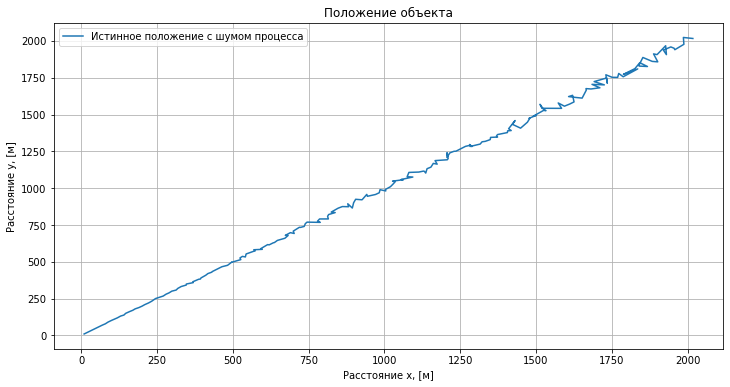

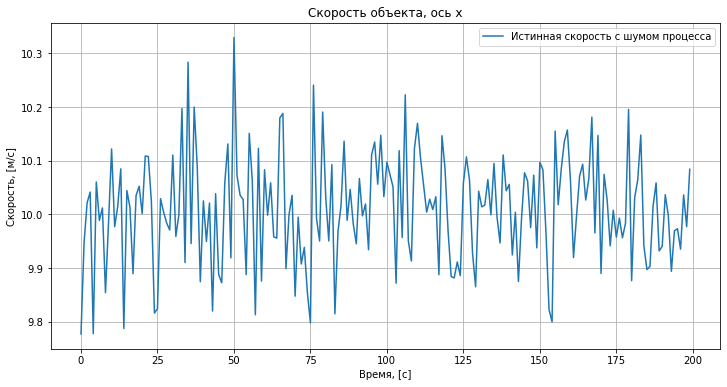

In [4]:
x_true, y_true, x_hat, y_hat = generate_data(10, 10, 10, 10, 200)

# Визуализация сгенерированных данных
t = range(0, 200)
plt.figure(figsize=(12, 6))
plt.plot(x_true, y_true, label='Истинное положение с шумом процесса')
plt.xlabel('Расстояние x, [м]')
plt.ylabel('Расстояние y, [м]')
plt.legend()
plt.grid()
plt.title(f'Положение объекта')
plt.show()

# Визуализация сгенерированных данных
plt.figure(figsize=(12, 6))
plt.plot(t, x_hat, label='Истинная скорость с шумом процесса')
plt.xlabel('Время, [с]')
plt.ylabel('Скорость, [м/с]')
plt.legend()
plt.grid()
plt.title(f'Скорость объекта, ось x')
plt.show()
